In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [154]:
df = pd.read_excel('Digi_2.xlsx') 
df.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژ...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [79]:
df.comment.loc[4]

'اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژر 5 ولت 2 آمپر براش تهیه کنید تا سریعتر شارژ شه. خود برند شیائومی شارژر های خوبی داره.\r\nظرافتش خوبه و وزن و ضخامت کمی داره و مثل یه موبایل راحت حمل میشه. البته پیشنهاد من ظرفیت های بالاتر هست. چون این مدل بسته به ظرفیت باتری گوشیتون صرفا به اندازه یک الی 2 بار شارژ کردن، انرژی ذخیره میکنه.'

### size of data

In [7]:
len(df)

100000

In [80]:
df.columns

Index(['product_id', 'product_title', 'title_en', 'user_id', 'likes',
       'dislikes', 'verification_status', 'recommend', 'title', 'comment',
       'advantages', 'disadvantages'],
      dtype='object')

### check dataset

In [10]:
df.verification_status.value_counts()

verified        98496
rejected         1263
not_verified      241
Name: verification_status, dtype: int64

In [82]:
df.title_en.unique()

array(['IT', 'AC', 'HW', 'MO', 'PC', 'PA', 'TC', 'TS', 'MA', 'HA', 'AV',
       'FA', 'HC', 'BC', 'DF', 'GC', 'GF', 'FF'], dtype=object)

In [8]:
df.product_id.value_counts()

700304    198
180451    172
319878    150
111178    139
643764    131
         ... 
507345      1
218572      1
439728      1
552363      1
385500      1
Name: product_id, Length: 50235, dtype: int64

In [84]:
df.user_id.value_counts()

764992     265
1152044    182
4964994    154
2870189     97
535912      94
          ... 
8148844      1
6451051      1
1108289      1
7849822      1
5830529      1
Name: user_id, Length: 56692, dtype: int64

In [28]:
df.verification_status.value_counts()

verified        98496
rejected         1263
not_verified      241
Name: verification_status, dtype: int64

In [159]:
df.recommend = df.recommend.replace('\\N','unknown')

In [27]:
df.recommend.value_counts()

recommended        36972
unkown             36382
not_recommended    16110
no_idea            10536
Name: recommend, dtype: int64

In [160]:
df.disadvantages = df.disadvantages.fillna('unknown')
df.advantages = df.advantages.fillna('unknown')
df.comment = df.comment.fillna('unknown')

In [48]:
df.disadvantages.value_counts()

unknown                                                                                     65879
["ندارد"]                                                                                    3121
["هیچی"]                                                                                      984
["نداره"]                                                                                     801
["ندیدم"]                                                                                     427
                                                                                            ...  
["اگه محیط بزرگ دارین اصلا مناسب نیس چون اصلا از دیوار رد نمیشه امواجش خیلی کم رد میشه"]        1
["یک مقداری سنگین است"]                                                                         1
["من هیچ نقطه ضعفی ندیدم ازش"]                                                                  1
["فاقد پخش بو فاقد ماتدگاری طولانی و فاقد اشانتیون و سایر لوازم داخلی بسته"]                    1
["صفحه نمایش "]     

تهیه لیستی از کلماتی که اگر داخل معایب باشند نشون میده طرف رضایت کامل نسبت به محصول داشته
ی سوال مهم اگر معایب خالی باشه چیکار کنیم آیا باید مزایا هم بررسی کرد؟

In [50]:
df.advantages.value_counts()

unknown                                                                                                     57759
["ندارد"]                                                                                                    1307
["همه چی"]                                                                                                    515
["هیچی"]                                                                                                      510
["عالی"]                                                                                                      350
                                                                                                            ...  
["خیلی کارش راحته و وااااقعا دقت بالایی داره، شکل خیلی خوب و ساده‌ای داره و راحت تو کیف یا جیب جا میشه"]        1
["زردآب. مقام در برابر ضربه سطحی "]                                                                             1
["عالیه برای متراژ دقیق کارهای پنجره سازی و ساختمان سازی "]                             

تهیه لیستی از کلماتی که اگر داخل مزایا باشند نشون میده طرف  نسبت به محصول نااراضی بوده
ی سوال مهم اگر مزایا خالی باشه چیکار کنیم آیا باید مزایا هم بررسی کرد؟
اگر هر دو ستون مزایا و معایب خالی بود چی؟

In [47]:
df[df['product_id']==700304]

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
3368,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,4102406,60,2,verified,unkown,خرید این کالا را پیشنهاد می کنم,در یک کلام ، خیلی بهتر از چیزی بود که انتظار د...,"[""ظرفیت مناسب\r"",""ظرفیت واقعی\r"",""اندازه و سای...",unknown
3371,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,1051988,53,2,verified,unkown,10000 میلی 3 پورت,نسبت به پولی که میدی واقعا می ارزه . کاراییش خ...,"[""3 پورت""]",unknown
3372,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,4177161,47,2,verified,unkown,ظرفیت ولقعی,کیفیت ساخت خوب- سایز مناسب با توجه به ظرفیت و ...,"[""سه پورت خروجی\r"",""شدت جریان خروجی 2 آمپر\r"",...",unknown
3374,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,5051987,48,2,verified,unkown,خیلی خوش دسته,زود شارژ شد\r\nآیفون ایکس رو دو بار کامل شارژ...,"[""10000 واقعی\r"",""برند و گارانتی معتبر""]",unknown
3649,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,7006459,6,41,verified,unkown,جالب نیست,کیفیت نسبتا پایین,"[""سبکی""]","[""کیفیت پایین""]"
3880,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,7129605,24,2,verified,unkown,خیلی خوب,من یک ماه خریدم و خیلی رازیم,"[""زیبا \r"",""با قدرت""]","[""ندارد""]"
3884,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,1375537,33,5,verified,unkown,تازه دستم رسید,خوبی اینه که ۲ آمپر قدرت داره . ۸۰۰۰ میلی آمپر...,"[""چراغ LED\r"",""8000 میلی آمپر""]","[""2000 میلی آمپرش کار نمیکنه""]"
3945,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,2898549,26,3,verified,unkown,پاوربانک,بسیار عالی میباشد.حتما پیشنهاد میکنم.نسبت به ت...,"[""طراحی زیبا.قیمت مناسب""]","[""ندارد""]"
4125,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,7067797,19,2,verified,unkown,پاور بانک,سلام.. یکی گرفتیم ان شاالله نظرمونو جلب کند..,NaN,unknown
4195,700304,شارژر همراه هویت مدل H524 ظرفیت 10000 میلی آمپ...,AC,7801571,12,1,verified,unkown,حتماً بخرید,عاالیه,NaN,unknown


### diagrams

In [85]:
import seaborn as sns
%matplotlib inline

In [90]:
df.likes.describe()

count    100000.000000
mean          3.114790
std           8.050031
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         854.000000
Name: likes, dtype: float64

In [104]:
8.050031 * 2  

16.100062

In [91]:
df.dislikes.describe()

count    100000.000000
mean          1.649460
std           8.912705
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1344.000000
Name: dislikes, dtype: float64

In [105]:
8.912705 * 2  

17.82541

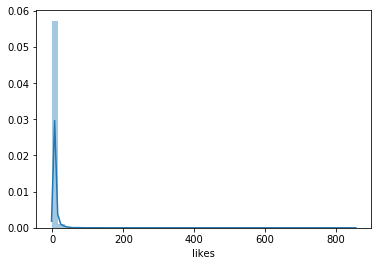

In [102]:
sns.distplot(df.likes)

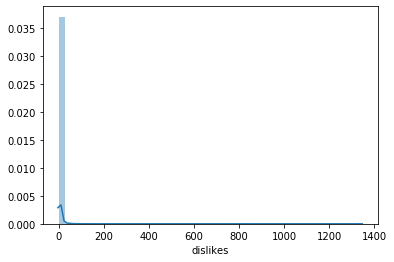

In [96]:
sns.distplot(df.dislikes)

### convert like and dislike

In [155]:
df['newlikes'] = df.likes.apply(lambda x: 'very like' if x > 17 else 'like' )
df['newldisikes'] = df.dislikes.apply(lambda x: 'very dislike' if x > 17 else 'dislike' )

In [111]:
df.newlikes.value_counts()

like         97740
very like     2260
Name: likes, dtype: int64

In [112]:
df.newldisikes.value_counts()

dislike         98855
very dislike     1145
Name: dislikes, dtype: int64

### cleansing cols

In [113]:
df.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,newlikes,newldisikes
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,unkown,NaN,واقعا عالیه. من که ازش خیلی راضیم,unknown,unknown,like,dislike
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",like,dislike
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,unknown,unknown,like,dislike
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن...",like,dislike
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژ...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]",very like,dislike


In [161]:
df.advantages = df.advantages.apply(lambda x : re.sub(r'[,\"\[\]]' , ' ' , x))
df.disadvantages = df.disadvantages.apply(lambda x : re.sub(r'[,\"\[\]]' , ' ' , x))

In [165]:
 df.disadvantages.loc[5].rstrip()

'  تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گویی و حس کیفیت\\r   بلندگوهاش میتونستن بهتر باشن از نظر بلندی و صدای بم (که البته با هدفون حل میشه)\\r   ویندوز اوریجینالش میتونست نسخه ی pro باشه بجای home'

### counting

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df[df.newlikes == 'very like'].advantages)
# X = vectorizer.fit_transform(df[df.newldisikes == 'very dislike'].disadvantages)

In [238]:
temp = pd.DataFrame(data = X.toarray() , columns = vectorizer.get_feature_names()).T
temp.loc[:,'Total'] = temp.sum(axis=1)
temp = temp[['Total']]

In [239]:
temp.sort_values(by = 'Total' , ascending= False)[:50]

,Total
unknown,1224.000000
ندارد,60.518357
کیفیت,48.722468
خوب,45.783564
عالی,43.252664
همه,38.874744
هیچی,31.688583
چی,28.204175
طراحی,27.729389
قیمت,27.083457


### check relation of cols

In [69]:
for x in df.recommend.unique():
    temp = df[(df['recommend'] == x) & (df['disadvantages'] == 'unknown')]
    print('recommend is '  + x + ' and disadvantages is unknown : ' +str(len(temp)))

recommend is unkown and disadvantages is unknown : 24429
recommend is recommended and disadvantages is unknown : 24806
recommend is not_recommended and disadvantages is unknown : 9854
recommend is no_idea and disadvantages is unknown : 6790


In [70]:
for x in df.recommend.unique():
    temp = df[(df['recommend'] == x) & (df['disadvantages'] != 'unknown')]
    print('recommend is '  + x + ' and disadvantages is known : ' +str(len(temp)))

recommend is unkown and disadvantages is known : 11953
recommend is recommended and disadvantages is known : 12166
recommend is not_recommended and disadvantages is known : 6256
recommend is no_idea and disadvantages is known : 3746


In [71]:
for x in df.recommend.unique():
    temp = df[(df['recommend'] == x) & (df['advantages'] == 'unknown')]
    print('recommend is '  + x + ' and advantages is unknown : ' +str(len(temp)))

recommend is unkown and advantages is unknown : 20141
recommend is recommended and advantages is unknown : 19693
recommend is not_recommended and advantages is unknown : 11229
recommend is no_idea and advantages is unknown : 6696


In [72]:
for x in df.recommend.unique():
    temp = df[(df['recommend'] == x) & (df['advantages'] != 'unknown')]
    print('recommend is '  + x + ' and advantages is known : ' +str(len(temp)))

recommend is unkown and advantages is known : 16241
recommend is recommended and advantages is known : 17279
recommend is not_recommended and advantages is known : 4881
recommend is no_idea and advantages is known : 3840


In [76]:
len(df[(df['recommend'] == 'recommended') & (df['advantages'] != 'unknown') & (df['disadvantages'] == 'unknown')])

5641

In [77]:
df[(df['recommend'] == 'recommended') & (df['advantages'] != 'unknown') & (df['disadvantages'] != 'unknown')]

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
5,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,497032,6,1,verified,recommended,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،\r\nمنم مثه بعضی از دوستان قبل از...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ..."
6,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,574130,3,0,verified,recommended,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]"
10,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,IT,794316,1,0,verified,recommended,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به..."
12,134367,ماشین بازی بیبی لند مدل Top Car,TS,3015544,10,5,verified,recommended,لطفا موجودش کنید,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,"[""بچه ام دیگه بیخیال ماشین ام شده همش با این ب...","[""نداره""]"
13,114006,شارژر همراه لنوو با ظرفیت 10400 میلی آمپر ساعت,AC,3007704,4,2,verified,recommended,پاور بانک,من این پاور بانک رو حدود یک سال پیش از دیجی کا...,"[""عالی""]","[""ندارد""]"
24,116387,اسپیکر هترون مدل HSP260,IT,2767161,3,0,verified,recommended,یک انتخاب هوشمند,اگر با قیمتش مشکلی ندارید نسبت به صداش شک نکنی...,"[""صدای فوق العاده\r"",""بیس عالی\r"",""بلوتوث سریع...","[""خط و خش سریع میفته روش\r"",""نداشتن صفحه نمایش""]"
26,110040,گوشی موبایل هوآوی مدل Mate 8 دو سیم‌کارت - ظرف...,MO,809624,24,6,verified,recommended,Huawei Mate 8,آپدیت: دو سال و نیم گذشت از خریدم. بهترین گوشی...,"[""صفحه نمایش بزرگ بدون نیاز به هیچ گونه محافظ\...","[""آپدیت های دیر نرم افزاری هووایی به خوارمیانه""]"
29,163519,جعبه نظم دهنده صندوق خودرو تاشو,TC,640425,10,2,verified,recommended,کیفیت و هزینه عالی,با سلام\r\nعالیه، امیدوارم شگفت انگیز شود و دو...,"[""ارزان، جادار، با کیفیت، تاشو و ........\r"",""...","[""باور کن نداره""]"
32,130386,هدست واقعیت مجازی سامسونگ مدل Gear VR,AC,4055366,1,0,verified,recommended,سامسونگ gear vr,سلام. دوستان این هدست با توجه به قیمتش فوق الع...,"[""تاچ پد اختصاصی\r"",""کیفیت عالی\r"",""قیمت مناسب...","[""داغ کردن گوشی (که طبیعیه)""]"
